In [1]:
import pandas as pd

creating a dataframe

In [2]:
df = pd.read_csv('Food_Data.csv', usecols=['Food Name', 'Calories', 'Cost', 'Not For people having:'])
df

,Food Name,Calories,Cost,Not For people having:
0,Butter Chicken,420,339,"Lactose Intolerance, Dairy Allergies, High Cho..."
1,Butter Chicken,408,329,"Lactose Intolerance, Dairy Allergies, High Cho..."
2,Butter Chicken,432,350,"Lactose Intolerance, Dairy Allergies, High Cho..."
3,Chole Bhature,445,100,"Gluten Intolerance, Celiac Disease"
4,Chole Bhature,416,120,"Gluten Intolerance, Celiac Disease"
...,...,...,...,...
139,Avocado toast,200,131,Avocado Allergies
140,Avocado toast,189,142,Avocado Allergies
141,Berry smoothie bowl,145,187,Diabetes
142,Berry smoothie bowl,150,190,Diabetes


details of the dataframe created 

In [3]:
print("""
The shape of the dataframe: {}
      
Dataframe's Description:
{}

Values:
{}
      
Head of the CALORIES Columns:
{}
""".format(df.shape, df.describe(), df.values, df["Calories"].head()))




The shape of the dataframe: (144, 4)
      
Dataframe's Description:
         Calories        Cost
count  144.000000  144.000000
mean   323.937500  155.020833
std    202.375584   68.975162
min     78.000000   39.000000
25%    155.250000  107.750000
50%    295.000000  150.000000
75%    422.250000  190.000000
max    953.000000  350.000000

Values:
[['Butter Chicken' 420 339
  'Lactose Intolerance, Dairy Allergies, High Cholesterol']
 ['Butter Chicken' 408 329
  'Lactose Intolerance, Dairy Allergies, High Cholesterol']
 ['Butter Chicken' 432 350
  'Lactose Intolerance, Dairy Allergies, High Cholesterol']
 ['Chole Bhature' 445 100 'Gluten Intolerance, Celiac Disease']
 ['Chole Bhature' 416 120 'Gluten Intolerance, Celiac Disease']
 ['Chole Bhature' 430 110 'Gluten Intolerance, Celiac Disease']
 ['Paranthas' 250 50 'Diabetes, Maintaining Weight']
 ['Paranthas' 277 60 'Diabetes, Maintaining Weight']
 ['Paranthas' 263 55 'Diabetes, Maintaining Weight']
 ['Biryani' 322 270 'Hypertension, High

# 1.DATA CLEANING

loading data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler

# Load the data from 'Food_Data.csv'
df = pd.read_csv('Food_Data.csv')


Visualising the missing values / EDA 

   serial no.       Food Name            Restaurant               Address  \
0           1  Butter Chicken      Moti Mahal Delux  Daryaganj, Old Delhi   
1           2  Butter Chicken              Havemore   Pandara Road Market   
2           3  Butter Chicken     Gulati Restaurant   Pandara Road Market   
3           4   Chole Bhature  Sita Ram Diwan Chand             Paharganj   
4           5   Chole Bhature       Chache Di Hatti           Kamla Nagar   

   Calories  Cost                             Not For people having:  
0       420   339  Lactose Intolerance, Dairy Allergies, High Cho...  
1       408   329  Lactose Intolerance, Dairy Allergies, High Cho...  
2       432   350  Lactose Intolerance, Dairy Allergies, High Cho...  
3       445   100                 Gluten Intolerance, Celiac Disease  
4       416   120                 Gluten Intolerance, Celiac Disease  
       serial no.    Calories        Cost
count  144.000000  144.000000  144.000000
mean    72.500000  323.9375

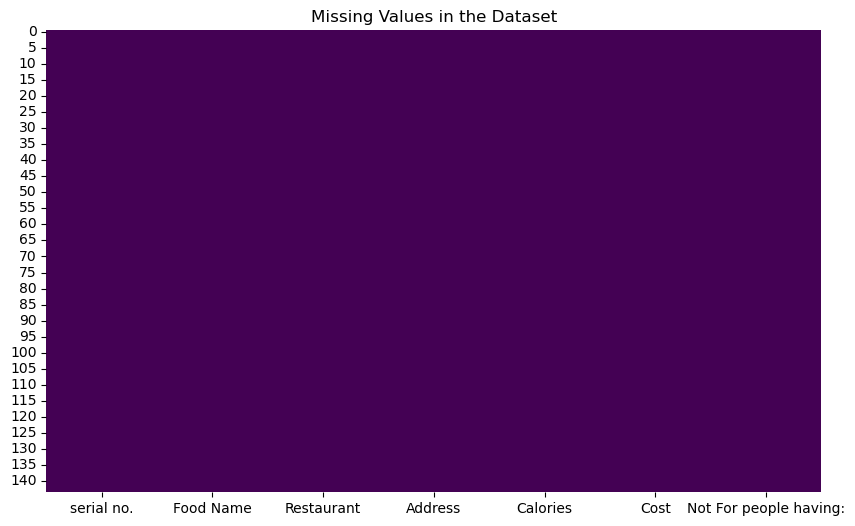

In [5]:
# Display the first few rows of the DataFrame
#print("First few rows of the DataFrame:")
print(df.head())

# Summary statistics of numerical columns
#print("\nSummary statistics of numerical columns:")
print(df.describe())

# Information about the DataFrame
#print("\nInformation about the DataFrame:")
print(df.info())

# Check for missing values
#print("\nMissing values:")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

handelling missing values

In [6]:
# Fill missing values in the 'Not For people having:' column with an empty string
df['Not For people having:'] = df['Not For people having:'].fillna('')


tokenizing the not for people having column

In [7]:
# Tokenize the 'Not For people having:' column
mlb = MultiLabelBinarizer()
tokenized_data = df['Not For people having:'].str.split(',')
tokenized_labels = mlb.fit_transform(tokenized_data)
tokenized_df = pd.DataFrame(tokenized_labels, columns=mlb.classes_)

# Print tokenized DataFrame
print("Tokenized DataFrame: \n")
print(tokenized_df)

Tokenized DataFrame: 

      Allergies   Celiac Disease   Dairy Allergies   Gastrointestinal Issues  \
0             0                0                 1                         0   
1             0                0                 1                         0   
2             0                0                 1                         0   
3             0                1                 0                         0   
4             0                1                 0                         0   
..          ...              ...               ...                       ...   
139           0                0                 0                         0   
140           0                0                 0                         0   
141           0                0                 0                         0   
142           0                0                 0                         0   
143           0                0                 0                         0   

      Gluten Sen

Feature Scaling 

In [8]:
# Feature scaling (standardization) on numerical columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Calories', 'Cost']])
#The 'fit_transform' function of the scaler is used to compute the mean and standard deviation necessary for the transformation and then applies the transformation to the 'Calories' and 'Cost' columns of the DataFrame (denoted as 'df').
df_scaled = pd.DataFrame(scaled_features, columns=['Calories_scaled', 'Cost_scaled'])

# Concatenate scaled features with the original DataFrame
df = pd.concat([df, df_scaled], axis=1)

#print("DataFrame with scaled features:")
print(df.head())


   serial no.       Food Name            Restaurant               Address  \
0           1  Butter Chicken      Moti Mahal Delux  Daryaganj, Old Delhi   
1           2  Butter Chicken              Havemore   Pandara Road Market   
2           3  Butter Chicken     Gulati Restaurant   Pandara Road Market   
3           4   Chole Bhature  Sita Ram Diwan Chand             Paharganj   
4           5   Chole Bhature       Chache Di Hatti           Kamla Nagar   

   Calories  Cost                             Not For people having:  \
0       420   339  Lactose Intolerance, Dairy Allergies, High Cho...   
1       408   329  Lactose Intolerance, Dairy Allergies, High Cho...   
2       432   350  Lactose Intolerance, Dairy Allergies, High Cho...   
3       445   100                 Gluten Intolerance, Celiac Disease   
4       416   120                 Gluten Intolerance, Celiac Disease   

   Calories_scaled  Cost_scaled  
0         0.476331     2.676635  
1         0.416829     2.531149  
2 

Defining the function to remove outliers

In [9]:
# Define function to remove outliers using the IQR method
# Interquartile Range (IQR)
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_cleaned

Removing outliers using IQR method

In [10]:

# Apply outlier removal to any column you want
data_cleaned = remove_outliers(df, 'Calories')


# #Outlier removal of the tokenized data
# # Apply outlier removal to all columns of the tokenized DataFrame (tokenized_df)
# for column_name in tokenized_df.columns:
#     tokenized_df = remove_outliers(tokenized_df, column_name)

# Print the DataFrame after removing outliers from all columns
print(tokenized_df)



      Allergies   Celiac Disease   Dairy Allergies   Gastrointestinal Issues  \
0             0                0                 1                         0   
1             0                0                 1                         0   
2             0                0                 1                         0   
3             0                1                 0                         0   
4             0                1                 0                         0   
..          ...              ...               ...                       ...   
139           0                0                 0                         0   
140           0                0                 0                         0   
141           0                0                 0                         0   
142           0                0                 0                         0   
143           0                0                 0                         0   

      Gluten Sensitivity or Celiac Dise

In [11]:
from sklearn.preprocessing import StandardScaler

# Feature scaling (standardization) on numerical columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Calories', 'Cost']])
df_scaled = pd.DataFrame(scaled_features, columns=['Calories_scaled', 'Cost_scaled'])

# Concatenate scaled features with the original DataFrame
df = pd.concat([df, df_scaled], axis=1)

# Print first few rows of the DataFrame with scaled features
print("DataFrame with scaled features:")
print(df.head())


DataFrame with scaled features:
   serial no.       Food Name            Restaurant               Address  \
0           1  Butter Chicken      Moti Mahal Delux  Daryaganj, Old Delhi   
1           2  Butter Chicken              Havemore   Pandara Road Market   
2           3  Butter Chicken     Gulati Restaurant   Pandara Road Market   
3           4   Chole Bhature  Sita Ram Diwan Chand             Paharganj   
4           5   Chole Bhature       Chache Di Hatti           Kamla Nagar   

   Calories  Cost                             Not For people having:  \
0       420   339  Lactose Intolerance, Dairy Allergies, High Cho...   
1       408   329  Lactose Intolerance, Dairy Allergies, High Cho...   
2       432   350  Lactose Intolerance, Dairy Allergies, High Cho...   
3       445   100                 Gluten Intolerance, Celiac Disease   
4       416   120                 Gluten Intolerance, Celiac Disease   

   Calories_scaled  Cost_scaled  Calories_scaled  Cost_scaled  
0       

Visualise once

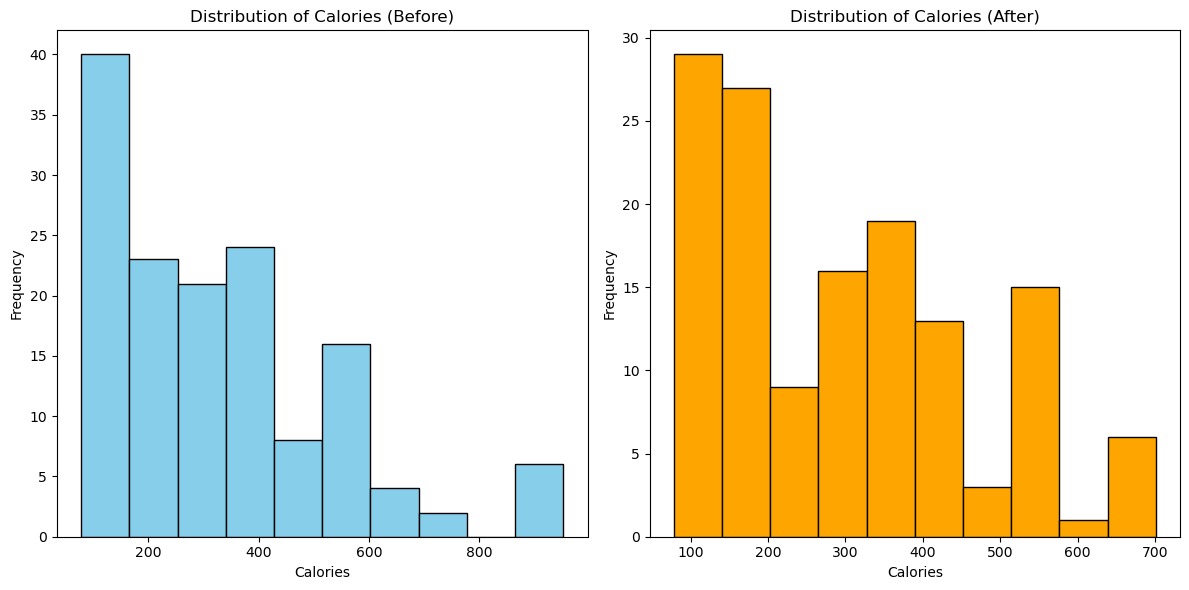

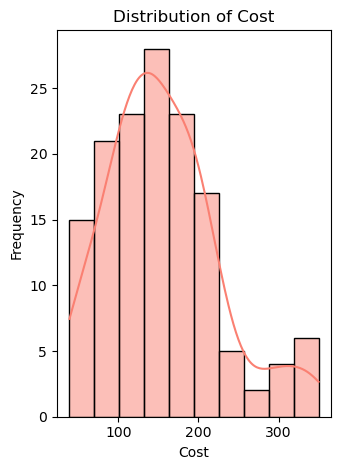

Text(0, 0.5, 'Frequency')

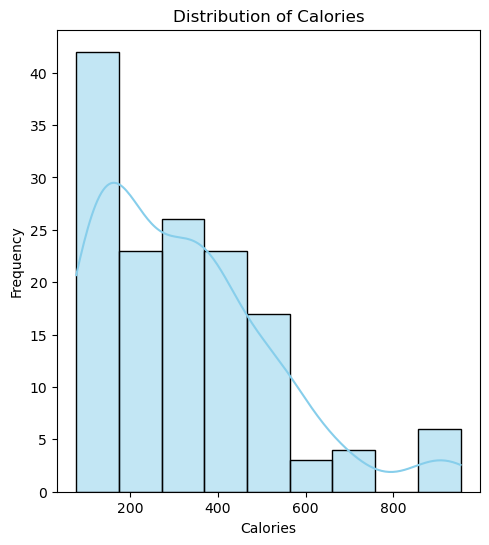

In [12]:
# Visualize the 'Calories' column before and after outlier removal
plt.figure(figsize=(12, 6))

# Plot original 'Calories' column
plt.subplot(1, 2, 1)
plt.hist(df['Calories'], color='skyblue', edgecolor='black')
plt.title('Distribution of Calories (Before)')
plt.xlabel('Calories')
plt.ylabel('Frequency')

# Plot 'Calories' column after outlier removal
plt.subplot(1, 2, 2)
plt.hist(data_cleaned['Calories'], color='orange', edgecolor='black')
plt.title('Distribution of Calories (After)')
plt.xlabel('Calories')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.subplot(1, 2, 2)
sns.histplot(df['Cost'], kde=True, color='salmon')
plt.title('Distribution of Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualize distributions of numerical columns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Calories'], kde=True, color='skyblue')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')


In [13]:
print("Cleaned DataFrame:")
data_cleaned

Cleaned DataFrame:


,serial no.,Food Name,Restaurant,Address,Calories,Cost,Not For people having:,Calories_scaled,Cost_scaled
0,1,Butter Chicken,Moti Mahal Delux,"Daryaganj, Old Delhi",420,339,"Lactose Intolerance, Dairy Allergies, High Cho...",0.476331,2.676635
1,2,Butter Chicken,Havemore,Pandara Road Market,408,329,"Lactose Intolerance, Dairy Allergies, High Cho...",0.416829,2.531149
2,3,Butter Chicken,Gulati Restaurant,Pandara Road Market,432,350,"Lactose Intolerance, Dairy Allergies, High Cho...",0.535834,2.836669
3,4,Chole Bhature,Sita Ram Diwan Chand,Paharganj,445,100,"Gluten Intolerance, Celiac Disease",0.600295,-0.800475
4,5,Chole Bhature,Chache Di Hatti,Kamla Nagar,416,120,"Gluten Intolerance, Celiac Disease",0.456497,-0.509503
...,...,...,...,...,...,...,...,...,...
139,140,Avocado toast,Leep cafe & bar,Safdarjung,200,131,Avocado Allergies,-0.614551,-0.349469
140,141,Avocado toast,Paulti,Pandara Road,189,142,Avocado Allergies,-0.669095,-0.189435
141,142,Berry smoothie bowl,Pint cafe,"Jama Masjid, Old Delhi",145,187,Diabetes,-0.887271,0.465251
142,143,Berry smoothie bowl,Irani cafe,"Jama Masjid, Old Delhi",150,190,Diabetes,-0.862479,0.508897


saving in seperate file / idk if necessary or not 

In [14]:
data_cleaned.to_csv('cleaned_data.csv', index=False)

# 2. Data Analysis

importing required libraries    

In [15]:
import seaborn as sns
sns.set()  #default style 
import pandas as pd


Plots

Scatter plot |  x-axis : cost | y-axis : calories


<Axes: xlabel='Cost', ylabel='Calories'>

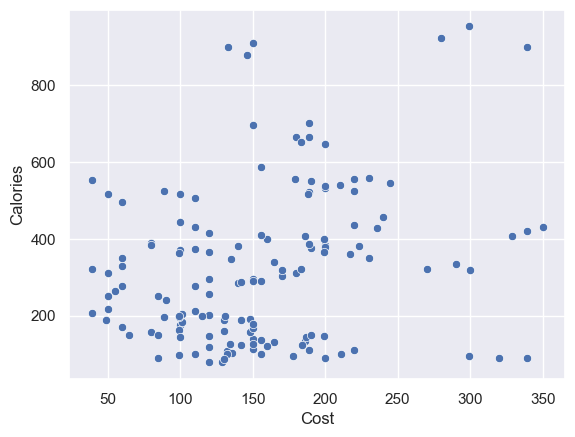

In [16]:
print("Scatter plot |  x-axis : cost | y-axis : calories")
graph = sns.scatterplot(x='Cost', y='Calories', data=df)
graph

Scatter plot |  x-axis : Food Name | y-axis : Not for the people having:


<Axes: xlabel='Food Name', ylabel='Not For people having:'>

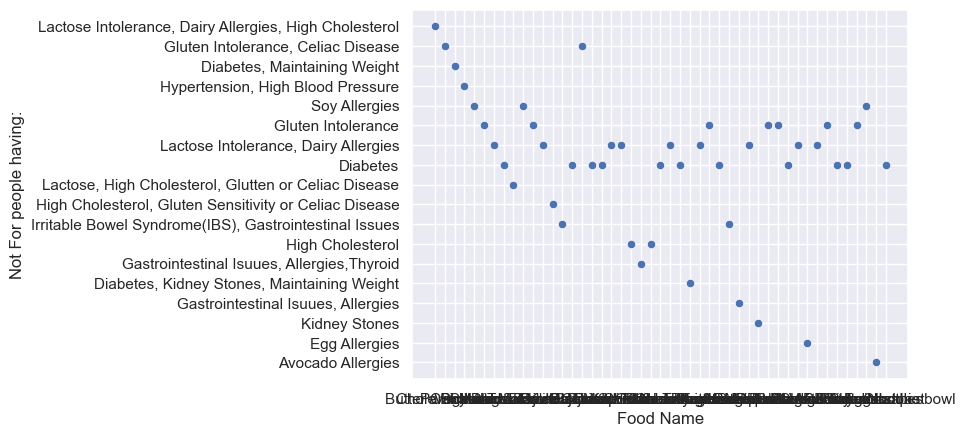

In [17]:
print("Scatter plot |  x-axis : Food Name | y-axis : Not for the people having:")

graph = sns.scatterplot(x='Food Name', y='Not For people having:', data=df)
graph


Histogram


<Axes: >

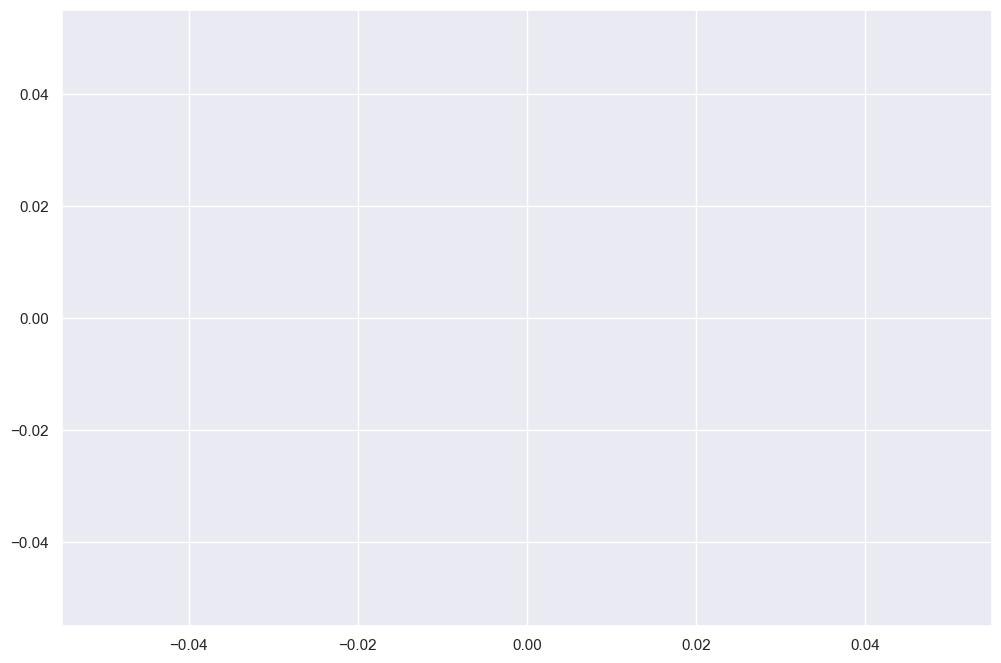

In [18]:
print("Histogram")


plt.figure(figsize=(12, 8))
sns.histplot(df[df['Cost'] == 0]['Calories'])
sns.histplot(df[df['Cost'] == 1]['Calories'], color='red')


In [19]:
df.head()

,serial no.,Food Name,Restaurant,Address,Calories,Cost,Not For people having:,Calories_scaled,Cost_scaled,Calories_scaled,Cost_scaled
0,1,Butter Chicken,Moti Mahal Delux,"Daryaganj, Old Delhi",420,339,"Lactose Intolerance, Dairy Allergies, High Cho...",0.476331,2.676635,0.476331,2.676635
1,2,Butter Chicken,Havemore,Pandara Road Market,408,329,"Lactose Intolerance, Dairy Allergies, High Cho...",0.416829,2.531149,0.416829,2.531149
2,3,Butter Chicken,Gulati Restaurant,Pandara Road Market,432,350,"Lactose Intolerance, Dairy Allergies, High Cho...",0.535834,2.836669,0.535834,2.836669
3,4,Chole Bhature,Sita Ram Diwan Chand,Paharganj,445,100,"Gluten Intolerance, Celiac Disease",0.600295,-0.800475,0.600295,-0.800475
4,5,Chole Bhature,Chache Di Hatti,Kamla Nagar,416,120,"Gluten Intolerance, Celiac Disease",0.456497,-0.509503,0.456497,-0.509503


Showing number of food item associated to any health condition

In [20]:
df['Not For people having:'].value_counts()

Not For people having:
Diabetes                                                  33
Lactose Intolerance, Dairy Allergies                      30
Gluten Intolerance                                        21
Soy Allergies                                              9
Gluten Intolerance, Celiac Disease                         6
Irritable Bowel Syndrome(IBS), Gastrointestinal Issues     6
High Cholesterol                                           6
Lactose Intolerance, Dairy Allergies, High Cholesterol     3
Diabetes, Kidney Stones, Maintaining Weight                3
Egg Allergies                                              3
Kidney Stones                                              3
Gastrointestinal Isuues, Allergies                         3
High Cholesterol, Gluten Sensitivity or Celiac Disease     3
Gastrointestinal Isuues, Allergies,Thyroid                 3
Lactose, High Cholesterol, Glutten or Celiac Disease       3
Hypertension, High Blood Pressure                          3
D

 proportions of items with 'Cost' and 'Calories' restrictions.

In [21]:

# counts = df['Not For people having:'].value_counts()
# plt.pie(counts.values, labels=counts.index, autopct="%0.2f")
# plt.show()

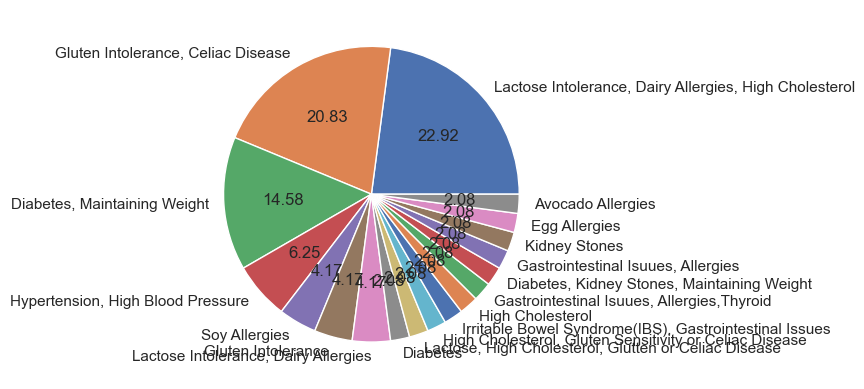

In [22]:
unique_values = df['Not For people having:'].unique()
labels = [str(value) for value in unique_values]

plt.pie(df['Not For people having:'].value_counts(), labels=labels, autopct="%0.2f")
plt.show()


Pairwise relationship betweenthe variables

C:\Users\ISHAN PESHKAR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


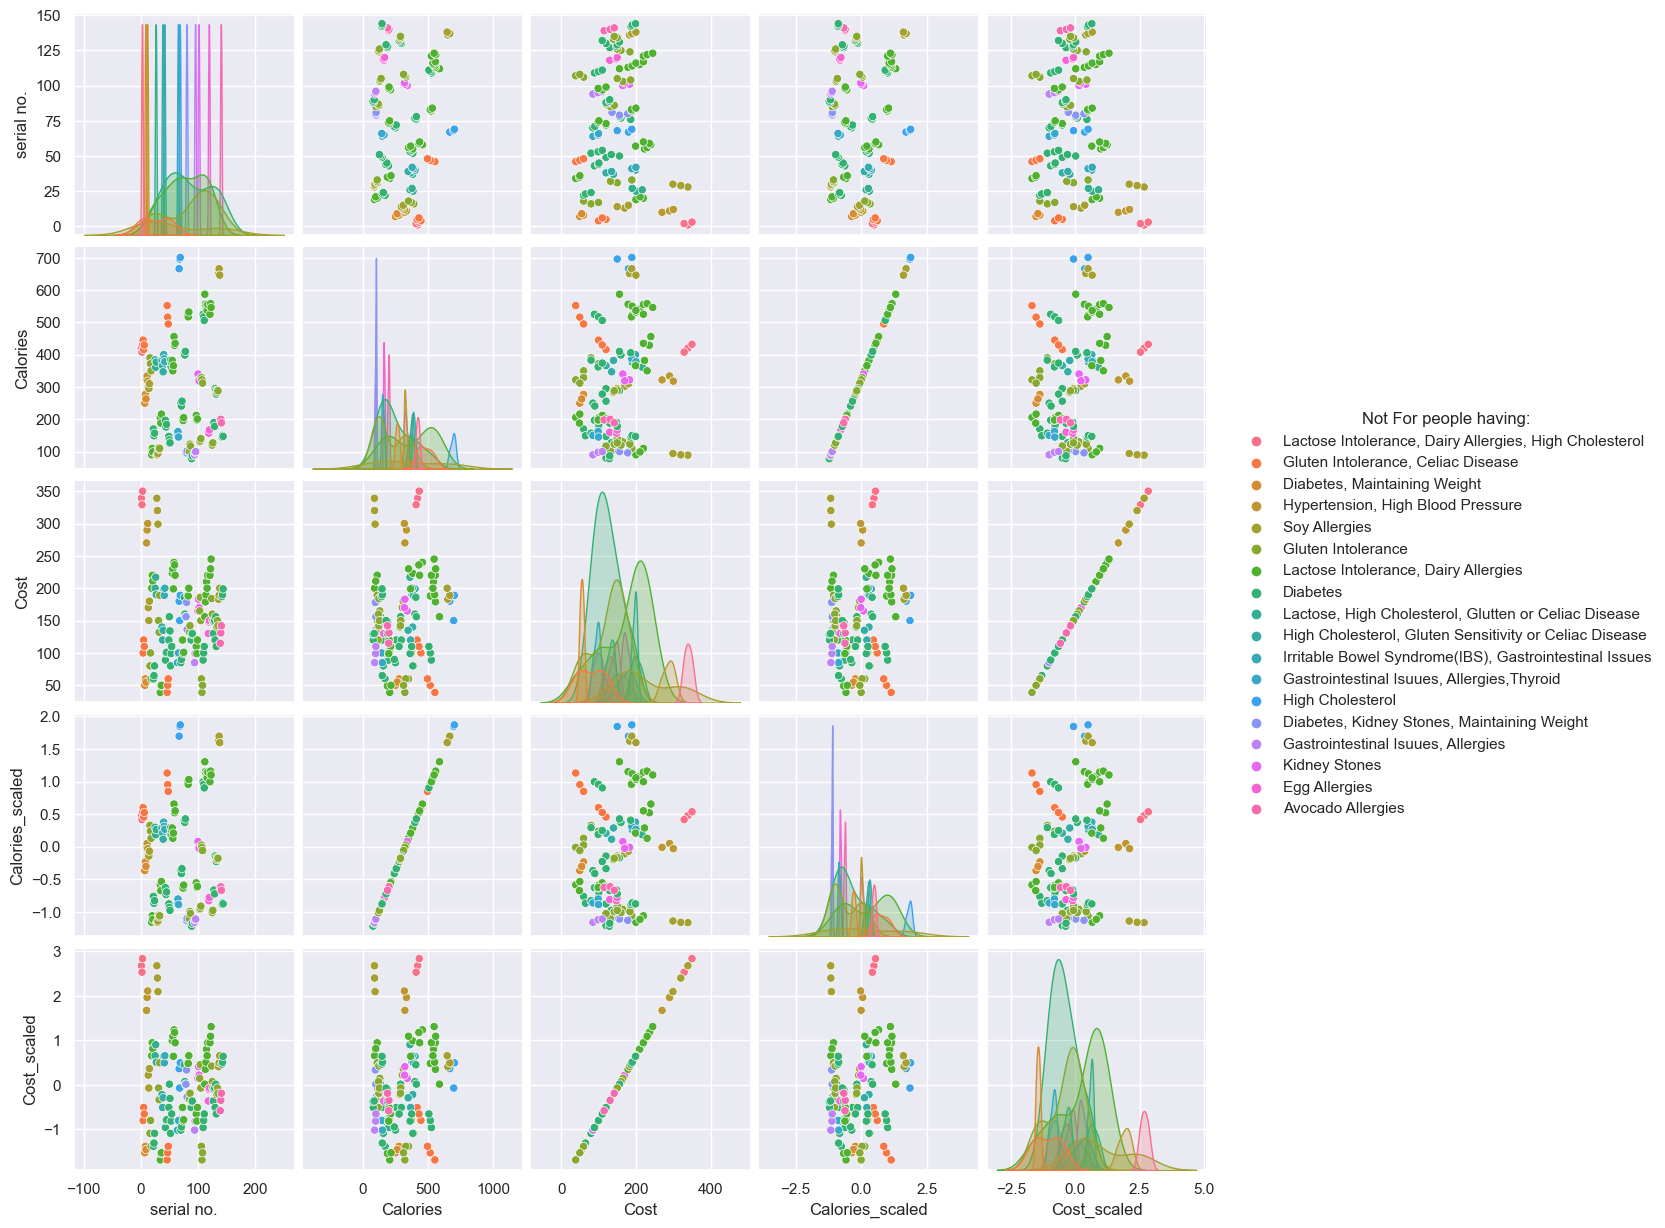

In [23]:
df_new =pd.read_csv('cleaned_data.csv')
sns.pairplot(df_new, hue='Not For people having:')
import time 


C:\Users\ISHAN PESHKAR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


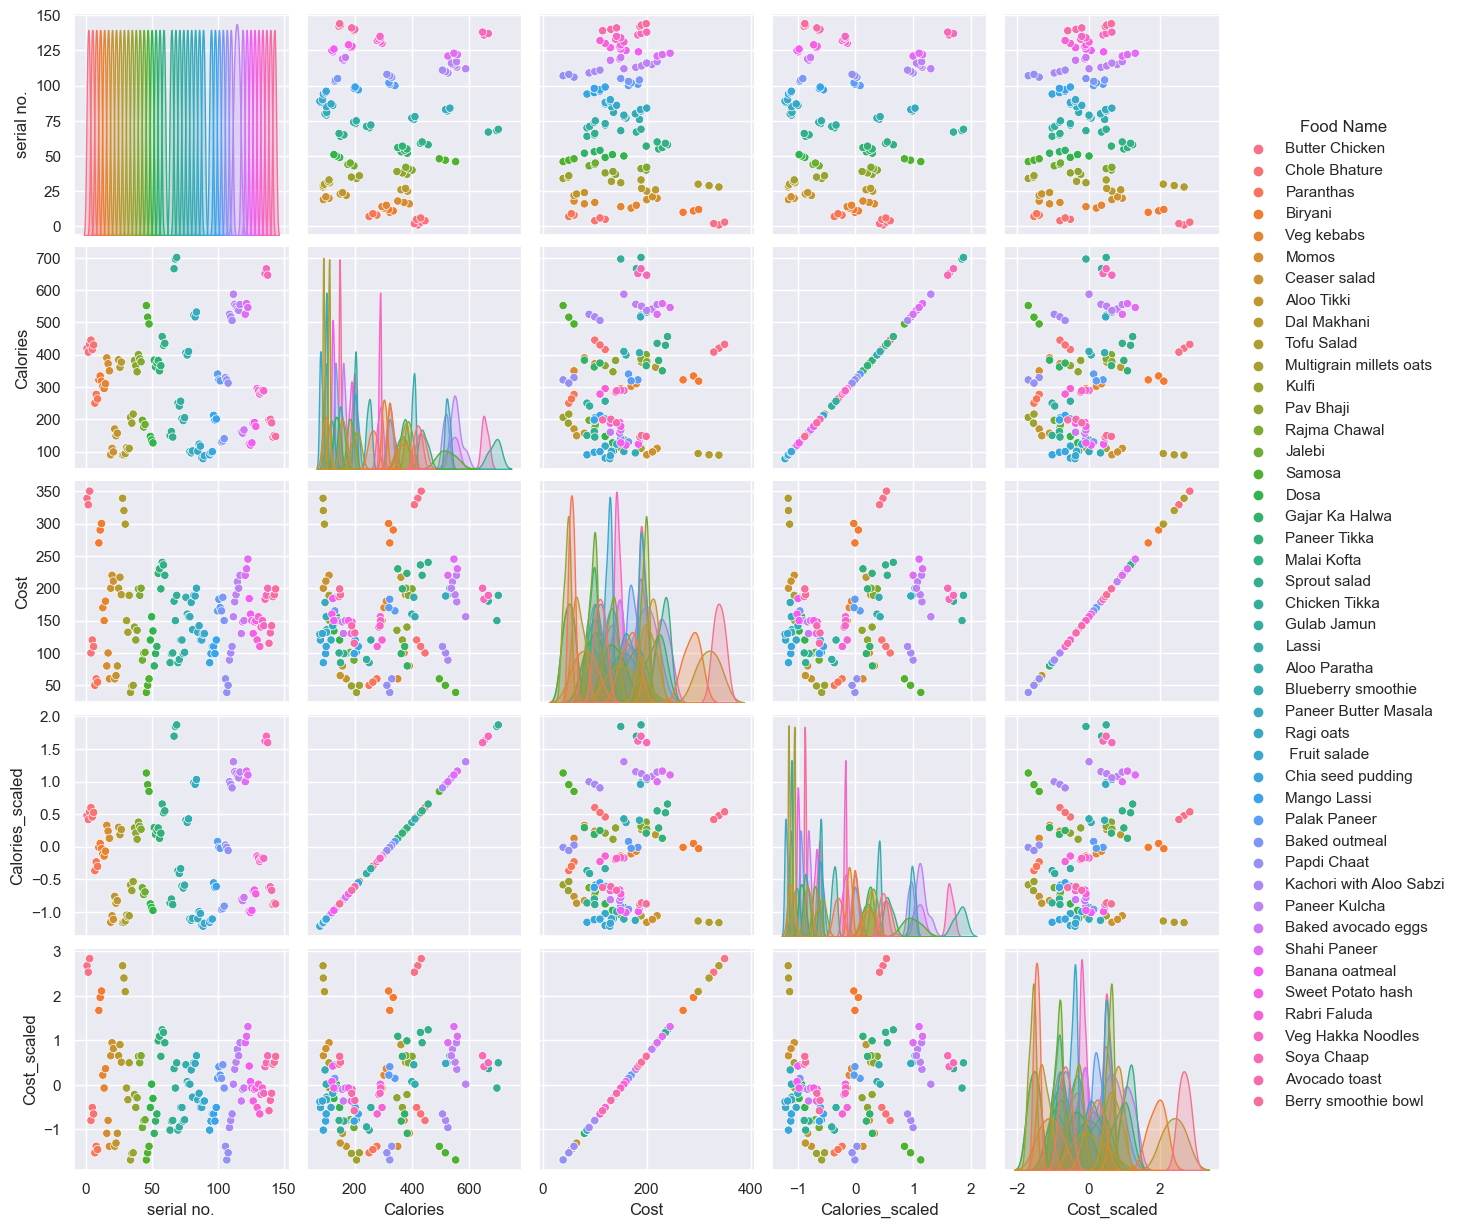

In [24]:
sns.pairplot(df_new,hue='Food Name')

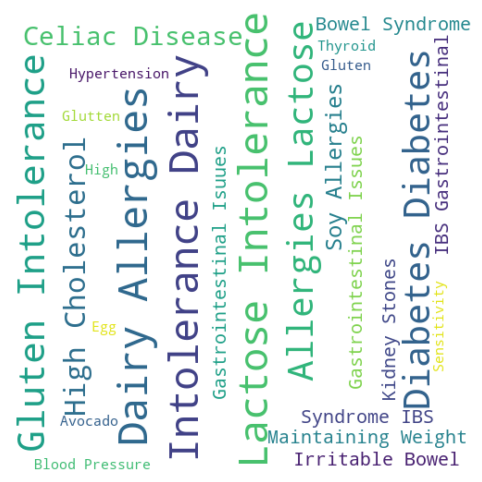

In [25]:
from wordcloud import WordCloud

# Concatenate all text data into a single string
text = ' '.join(df['Not For people having:'])

# Generate word cloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
wordcloud = wc.generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()


# 3. Machine Learning

In [26]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Assuming data_cleaned is your dataframe
data_cleaned = pd.read_csv('cleaned_data.csv')
data = data_cleaned.copy()

# Separate features and target variable
features = ["Calories_scaled", "Cost_scaled"] # This line creates a list of feature column names. It indicate which columns in the dataset are considered as features for the machine learning model.
target = "Food Name"  #This line specifies the target variable or the column in the dataset that the machine learning model will try to predict.


Train-Test Split:

In [27]:
from sklearn.model_selection import train_test_split   #This function is commonly used to split the dataset into training and testing sets for machine learning model evaluation.

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

#test_size=0.2: This parameter specifies that 20% of the data will be used for testing, while 80% will be used for training the model.
#random_state=42: This parameter sets a seed for the random number generator to ensure reproducibility, meaning the data will be split in the same way each time the code is run with the same seed

Train the Model:

In [28]:
# Create the decision tree classifier
model = DecisionTreeClassifier()  #type of supervised learning algorithm used for classification tasks.

# Train the model on the training data
model.fit(X_train, y_train)


DecisionTreeClassifier()

Trained Model Representation:

In [29]:

from sklearn.tree import export_text  #to generate a human-readable textual representation of the decision rules from a decision tree model.

# Get the first rule
rule = export_text(model, feature_names=features)

# Print the rule
print(rule)


#By utilizing the export_text function, you can gain insight into how the decision tree model makes decisions based on the input features.

|--- Cost_scaled <= 2.47
|   |--- Calories_scaled <= 0.95
|   |   |--- Cost_scaled <= 1.45
|   |   |   |--- Cost_scaled <= 0.92
|   |   |   |   |--- Calories_scaled <= -0.45
|   |   |   |   |   |--- Cost_scaled <= -1.46
|   |   |   |   |   |   |--- class: Kulfi
|   |   |   |   |   |--- Cost_scaled >  -1.46
|   |   |   |   |   |   |--- Cost_scaled <= -1.06
|   |   |   |   |   |   |   |--- class: Aloo Tikki
|   |   |   |   |   |   |--- Cost_scaled >  -1.06
|   |   |   |   |   |   |   |--- Calories_scaled <= -0.76
|   |   |   |   |   |   |   |   |--- Cost_scaled <= -0.65
|   |   |   |   |   |   |   |   |   |--- Calories_scaled <= -1.00
|   |   |   |   |   |   |   |   |   |   |--- class: Chia seed pudding
|   |   |   |   |   |   |   |   |   |--- Calories_scaled >  -1.00
|   |   |   |   |   |   |   |   |   |   |--- class: Sprout salad
|   |   |   |   |   |   |   |   |--- Cost_scaled >  -0.65
|   |   |   |   |   |   |   |   |   |--- Calories_scaled <= -0.99
|   |   |   |   |   |   |   |   | 

Prediction:

In [30]:

# Define a new data point (adjust values as needed)
new_data = [[0.9, 1.0]]  # Example: Calories, Cost

# Predict the food item
predicted_food = model.predict(new_data)[0]    #This line uses the trained model (presumably a decision tree classifier) to predict the food item based on the new data point. The predict method is used to obtain the predicted label for the input features in new_data. The [0] at the end retrieves the first prediction if there are multiple predictions.

# Find the corresponding food name in the original data
predicted_food_name = data[data["Food Name"] == predicted_food]["Food Name"].iloc[0]  #This line finds the corresponding food name in the original dataset (data) based on the predicted food item. It filters the original dataset for rows where the "Food Name" matches the predicted food item, and then retrieves the corresponding "Food Name" from the filtered rows.

print("Recommended Food:\n\n", predicted_food_name , "\n\n")



#he overall purpose of this code snippet is to use the trained decision tree classifier to predict a food item based on the new data point's features and then retrieve the corresponding food name from the original dataset.

Recommended Food:

 Malai Kofta 




C:\Users\ISHAN PESHKAR\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [31]:
import pickle

In [32]:
pickle.dump(model , open('modelIshan.pkl','wb'))